# Séparation de sources audio
___

In [12]:
import sounddevice as sd 
from Datasets.Audiodata import *

### I. Chargement des données et visualisation

*Chargement du dataset :*

In [13]:
dataset = Audiodataset(set='train_small')
print(len(dataset))

50


*Forme d'onde :*

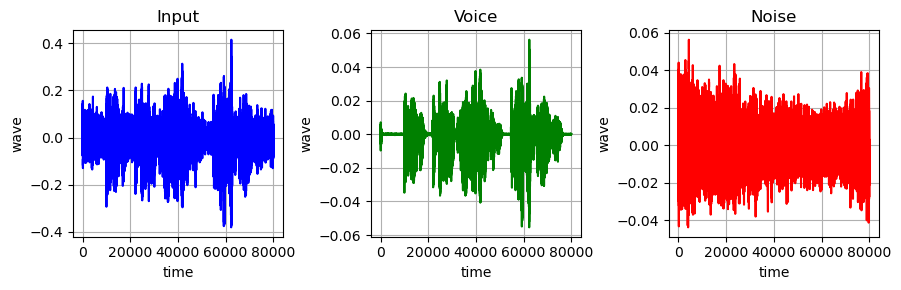

In [14]:
dataset.take_wave()
dataset.plot(0)

*Forme temps/fréquence :*

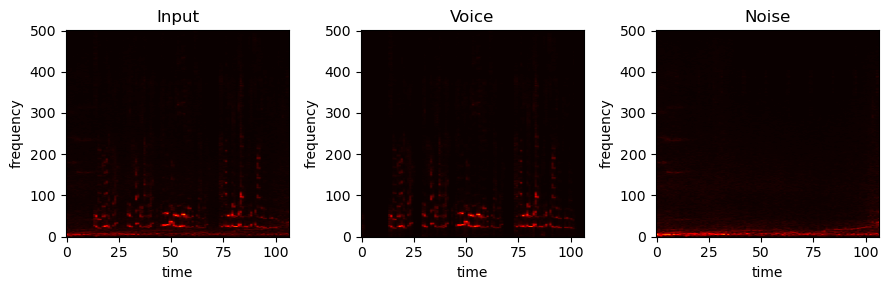

In [15]:
dataset.take_spectrogram()
dataset.plot(0)
plt.savefig('Figs/sp.png')

*Extraction du bruit seulement :*

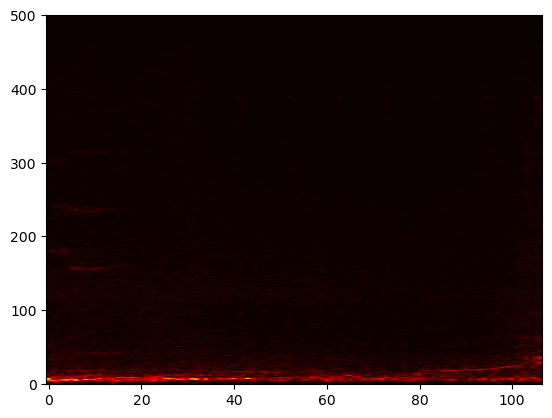

In [16]:
dataset.return_only_noise()
dataset.take_spectrogram()
X, Noise = dataset[0]
plt.imshow(Noise.squeeze().detach().numpy(), aspect='auto', origin='lower', cmap='hot')

*Extraction de la voix seulement :*

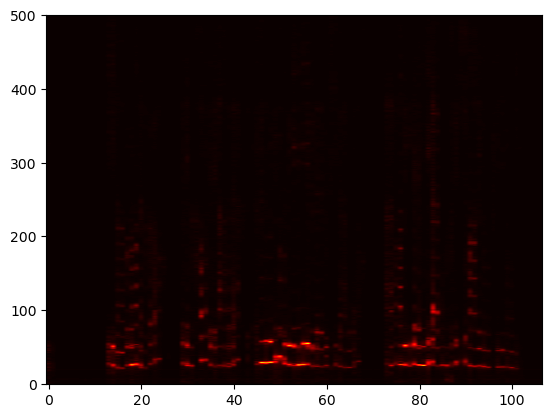

In [17]:
dataset.return_only_voice()
dataset.take_spectrogram()
X, Voice = dataset[0]
plt.imshow(Voice.squeeze().detach().numpy(), aspect='auto', origin='lower', cmap='hot')

*Reconstruction du son depuis la représentation temps/fréquence :*

In [ ]:
idx = 0
sr = 8000

dataset = Audiodataset('train_small', padding=True)
dataset.return_only_voice()
dataset.take_spectrogram()
X, VoiceSP = dataset[idx]

reconstruct = dataset.reconstruct(VoiceSP, idx, reference='voice')
sd.play(reconstruct.squeeze().numpy(), sr)
sd.wait()